In [31]:
from manage_exp import get_x0
from lin2d_exp import x_dim, sigma0, b_size, k, sigmap
from filters import Lin2d, Constructor

import matplotlib.pyplot as plt
import numpy as np
import torch


In [2]:
def log_message(message):
    print(message)
    print("-" * len(message) + "\n")

## 1- Prepare dataset for DAN

### 1.1- Linear 2d : periodic Hamiltonian dynamics

* Initialize x0 by using the function get_x0.

In [3]:
# initialize x0
# 
# Note :
# ------
# Instead of mb we can use b_size.

mb = 2 
x0 = get_x0(mb, x_dim, sigma0)

log_message("la valeur de x0 est :")
print(x0)

la valeur de x0 est :
---------------------

tensor([[2.9926, 2.9995],
        [2.9847, 2.9794]])


* Make a figure to show the dynamics of xt for t ≤ 50, staring from a random initialization
of x0. Use mb = 2 to show two simulations.

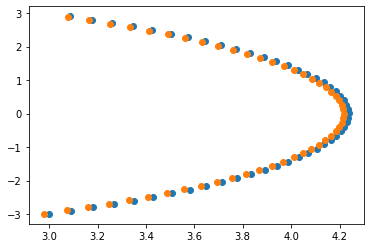

In [4]:
linear_2d = Lin2d(x_dim, 0, 0, 0)

N = 50

x = x0
x_values = torch.zeros((N, mb, x_dim))

for i in range(N):
    # store current value of x
    x_values[i] = linear_2d.forward(x)

    # update x
    x = x_values[i]

fig = plt.figure()
for simulation_idx in range(mb):
    x_axis = x_values[:, simulation_idx, 0]
    y_axis = x_values[:, simulation_idx, 1]

    color = np.random.randint(low=0, high=255, size=3)
    plt.scatter(x_axis, y_axis)
plt.show()

### 1.2- Integration with DAN

In [11]:
propagator = Constructor(**k["prop_kwargs"])
observer = Constructor(**k["obs_kwargs"])

log_message("propagator :")
print(propagator)

print()

log_message("observer :")
print(observer)

propagator :
------------

Constructor(
  (loc): Lin2d()
  (scale_vec): Cst()
)

observer :
----------

Constructor(
  (loc): Id()
  (scale_vec): Cst()
)


* In order to generate x_t+1, you will sample a Gaussian distribution N (M . x_t, σ_p . I)

In [46]:
def generate_gaussian(mean, std):
    return torch.normal(mean, std)

I = torch.eye(x_dim)
M = propagator._modules["loc"].M 

mean = torch.matmul(M, x0)
std = sigmap * I

generate_gaussian(mean, std)

tensor([[3.0894, 3.0916],
        [2.8893, 2.8774]])

* In the linear 2d case, make a figure to show the dynamics of y_t for t ≤ 50, staring from
a random initialization of x0. Use mb = 2 to show two simulations.

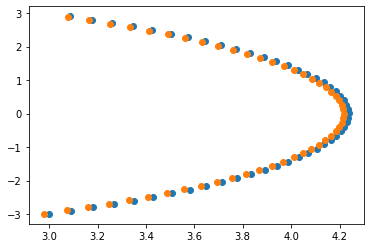

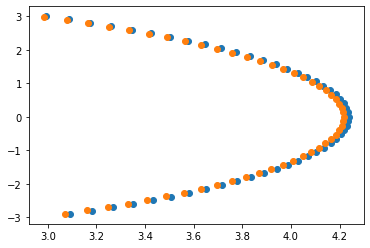

In [52]:
N = 50

x = x0
x_values = torch.zeros((N, mb, x_dim))
y_values = torch.zeros((N, mb, x_dim))

for i in range(N):
    # store current value of x and y
    x_values[i] = propagator._modules["loc"].forward(x)
    y_values[i] = observer._modules["loc"].forward(x)

    # update x and y
    x = x_values[i]
    y = y_values[i]

fig = plt.figure()
for simulation_idx in range(mb):
    x_axis = x_values[:, simulation_idx, 0]
    y_axis = x_values[:, simulation_idx, 1]

    color = np.random.randint(low=0, high=255, size=3)
    plt.scatter(x_axis, y_axis)
plt.show()

fig = plt.figure()
for simulation_idx in range(mb):
    x_axis = y_values[:, simulation_idx, 0]
    y_axis = y_values[:, simulation_idx, 1]

    color = np.random.randint(low=0, high=255, size=3)
    plt.scatter(x_axis, y_axis)
plt.show()